In [1]:
library(readr)

In [3]:
data = read.csv("laba7.csv", sep = ";")

In [4]:
data. = data [,c(1,3:14)]      #without sernames
data.numeric = data[,c(9:14)]  #only numeric columns

In [5]:
head(data.numeric)

ask,dkr,control,themes,absense,rating
3,15,61,12,10,91
3,15,67,27,4,115
0,6,33,12,11,51
3,15,55,24,5,100
3,15,62,12,10,92
3,15,67,18,7,106


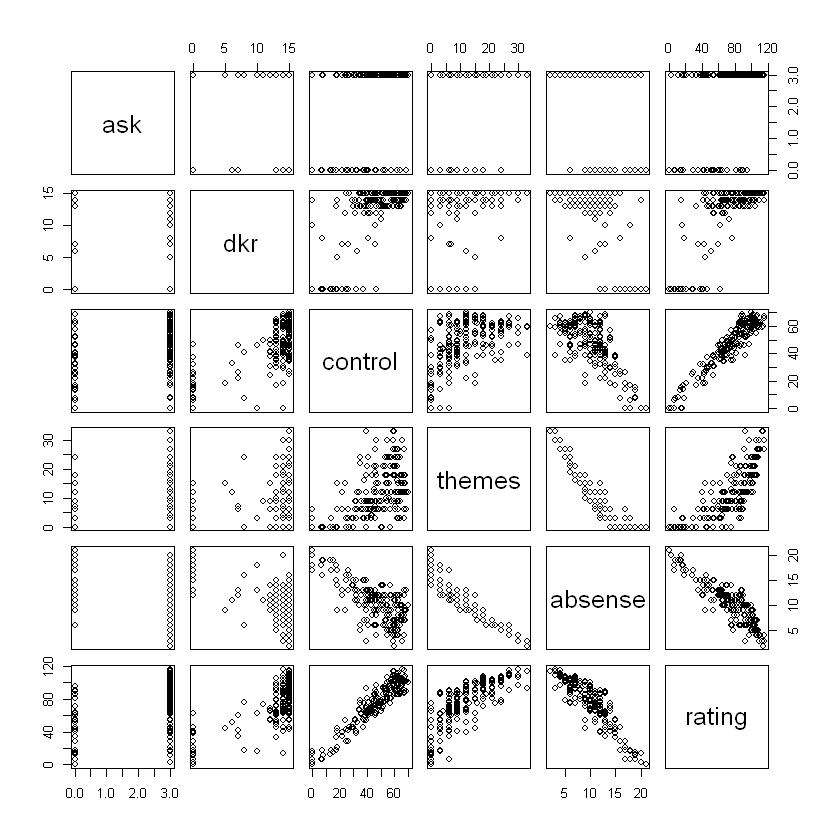

In [6]:
pairs(data.numeric) ## попарный анализ

In [7]:
cor.test(x = data$rating, y = data$absense) ## отрицательная зависимость


	Pearson's product-moment correlation

data:  data$rating and data$absense
t = -28.031, df = 207, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9149051 -0.8574712
sample estimates:
       cor 
-0.8896554 


In [8]:
cor.test(x = data$rating, y = data$themes)  ## положительная зависимость


	Pearson's product-moment correlation

data:  data$rating and data$themes
t = 16.939, df = 207, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6987429 0.8137241
sample estimates:
      cor 
0.7621803 


In [9]:
library(psych)

Warning message:
"package 'psych' was built under R version 3.4.4"

In [10]:
corr = corr.test(data.numeric)

In [11]:
corr$r

,ask,dkr,control,themes,absense,rating
ask,1.0000000,0.4619574,0.4204317,0.3272097,-0.4858318,0.4967374
dkr,0.4619574,1.0000000,0.6809528,0.4157386,-0.5985987,0.7525810
control,0.4204317,0.6809528,1.0000000,0.5353191,-0.7073655,0.9419795
themes,0.3272097,0.4157386,0.5353191,1.0000000,-0.9408554,0.7621803
absense,-0.4858318,-0.5985987,-0.7073655,-0.9408554,1.0000000,-0.8896554
rating,0.4967374,0.7525810,0.9419795,0.7621803,-0.8896554,1.0000000


In [12]:
corr$p

,ask,dkr,control,themes,absense,rating
ask,0.000000e+00,7.652581e-12,6.990351e-10,1.325920e-06,4.443022e-13,1.209609e-13
dkr,1.913145e-12,0.000000e+00,7.180726e-29,7.705462e-10,8.378734e-21,2.226916e-38
control,2.330117e-10,7.978585e-30,0.000000e+00,4.753065e-16,5.037614e-32,6.445200e-99
themes,1.325920e-06,3.852731e-10,6.790093e-17,0.000000e+00,4.133138e-98,7.029651e-40
absense,8.886045e-14,1.047342e-21,5.037614e-33,2.952241e-99,0.000000e+00,2.741166e-71
rating,2.016015e-14,2.024469e-39,4.296800e-100,5.858043e-41,2.108590e-72,0.000000e+00


In [13]:
lm.data = lm(rating ~ absense, data) ## построение линейной регрессии

In [14]:
lm(rating ~ absense, data)


Call:
lm(formula = rating ~ absense, data = data)

Coefficients:
(Intercept)      absense  
    137.524       -6.031  


In [15]:
a = summary(lm.data) ## rat = -6*abs +137.5

In [16]:
summary(lm.data)


Call:
lm(formula = rating ~ absense, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.249  -7.340   0.629   8.690  29.873 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.5237     2.3334   58.94   <2e-16 ***
absense      -6.0305     0.2151  -28.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.33 on 207 degrees of freedom
Multiple R-squared:  0.7915,	Adjusted R-squared:  0.7905 
F-statistic: 785.7 on 1 and 207 DF,  p-value: < 2.2e-16


In [17]:
conv.inerval_free = c(a$coefficients[1]-a$coefficients[3],a$coefficients[1] + a$coefficients[3])
conv.inerval_coef = c(a$coefficients[2]-a$coefficients[4],a$coefficients[2] + a$coefficients[4])

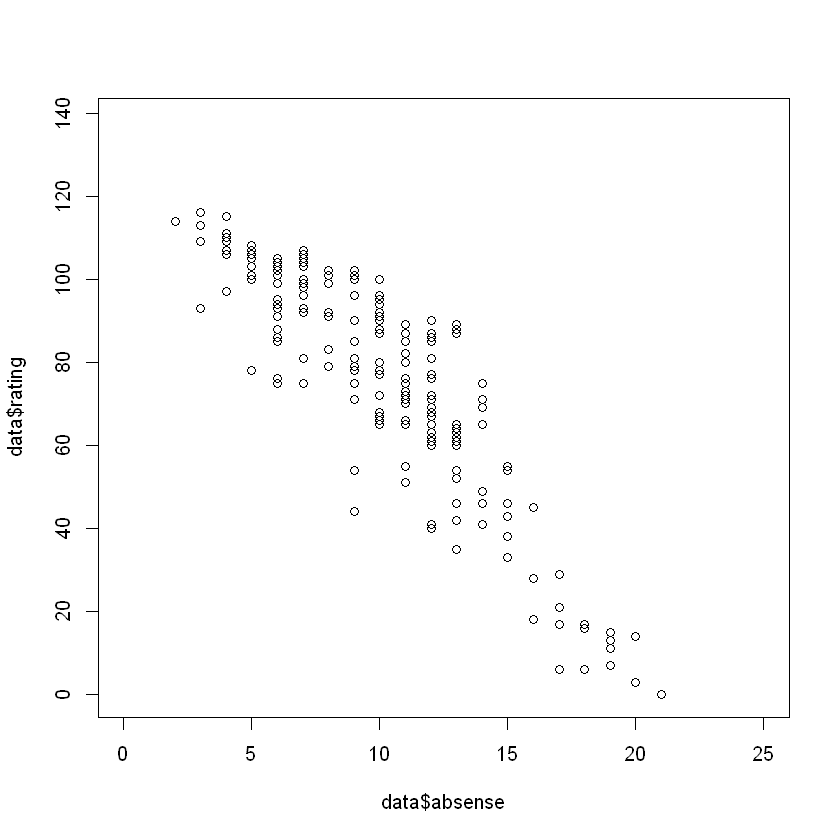

In [18]:
plot(data$rating ~ data$absense, ylim = c(0,138), xlim = c(0,25))

Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



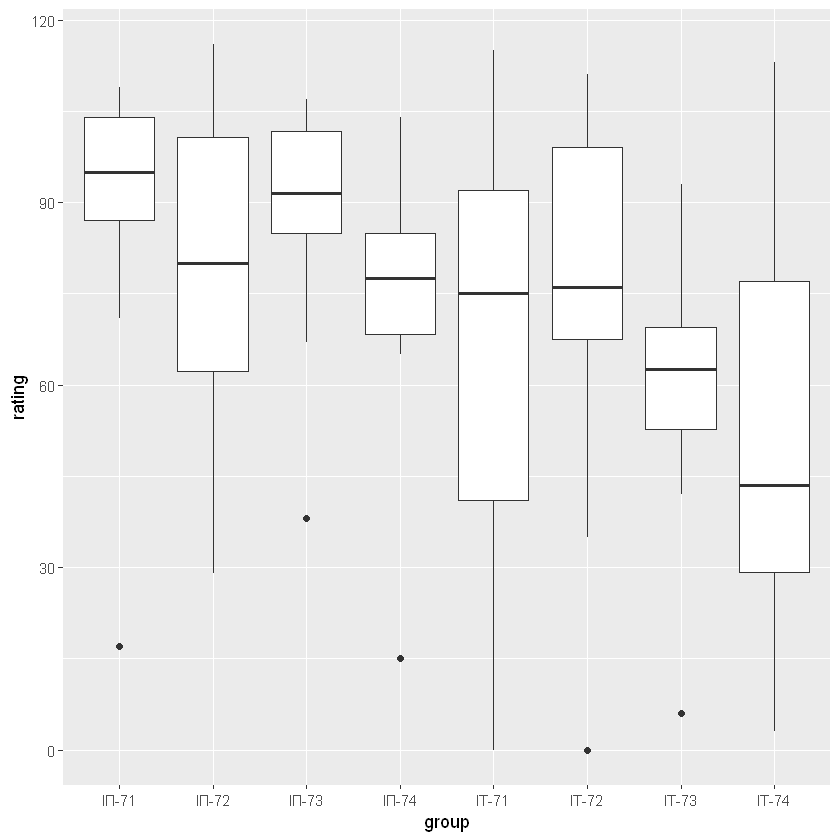

In [22]:
library(ggplot2)
ggplot(data, aes(x = group, y = rating)) + 
  geom_boxplot()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


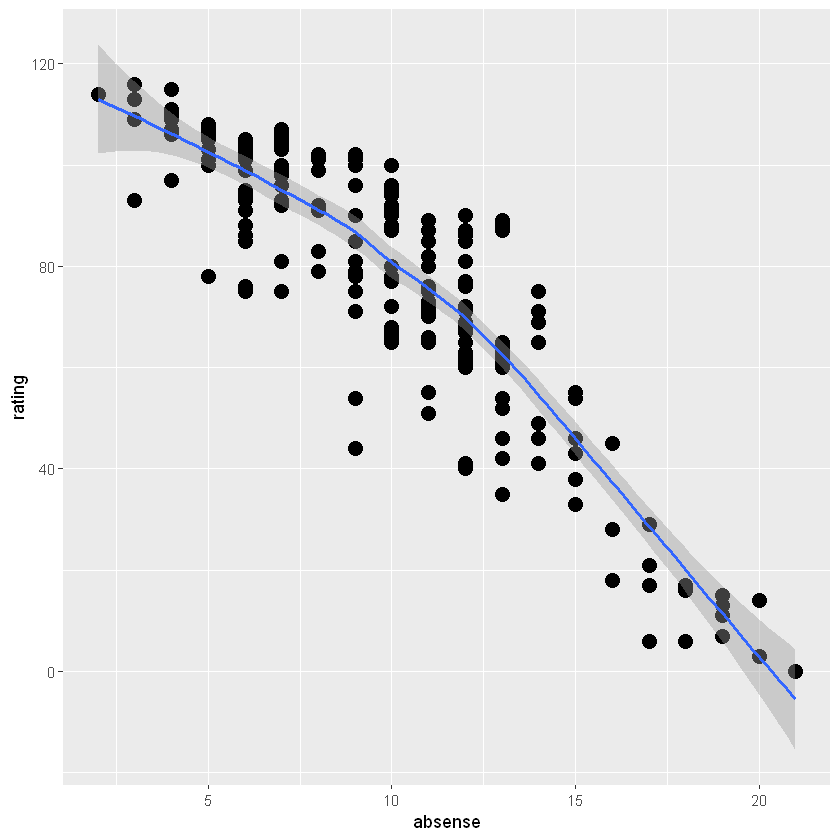

In [23]:
#smoothing
ggplot(data, aes(absense, rating))+
  geom_point(size = 4)+
  geom_smooth()

In [24]:
absense100 = data$absense[1:70]
rating100 = data$rating[1:70]
data100 = data.frame(absense = absense100, rating = rating100)

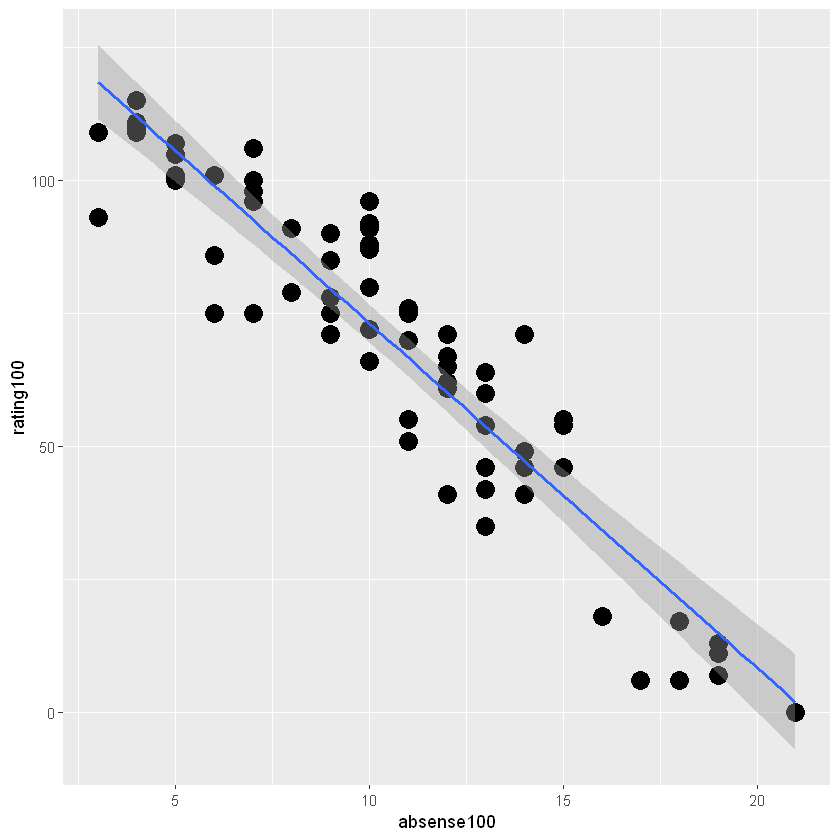

In [26]:
#smoothing line
ggplot(data100, aes(absense100, rating100))+
  geom_point(size = 5)+
  geom_smooth(method = "lm", level = 0.99)

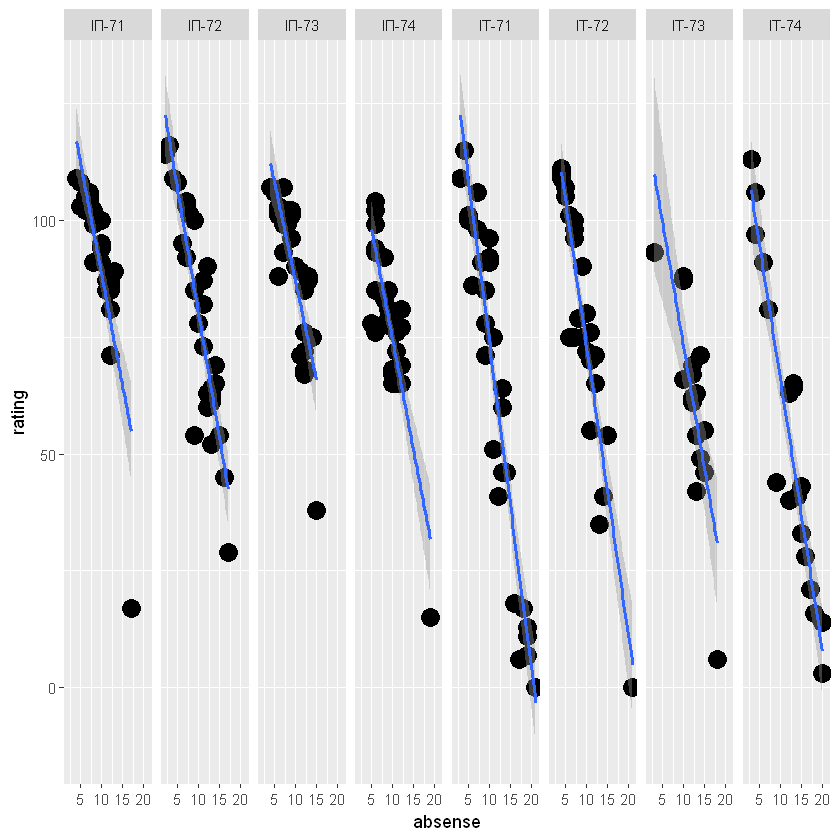

In [27]:
#smoothing line on groups
ggplot(data, aes(absense, rating))+
  geom_point(size = 5)+
  geom_smooth(method = "lm")+
  facet_grid(.~group)

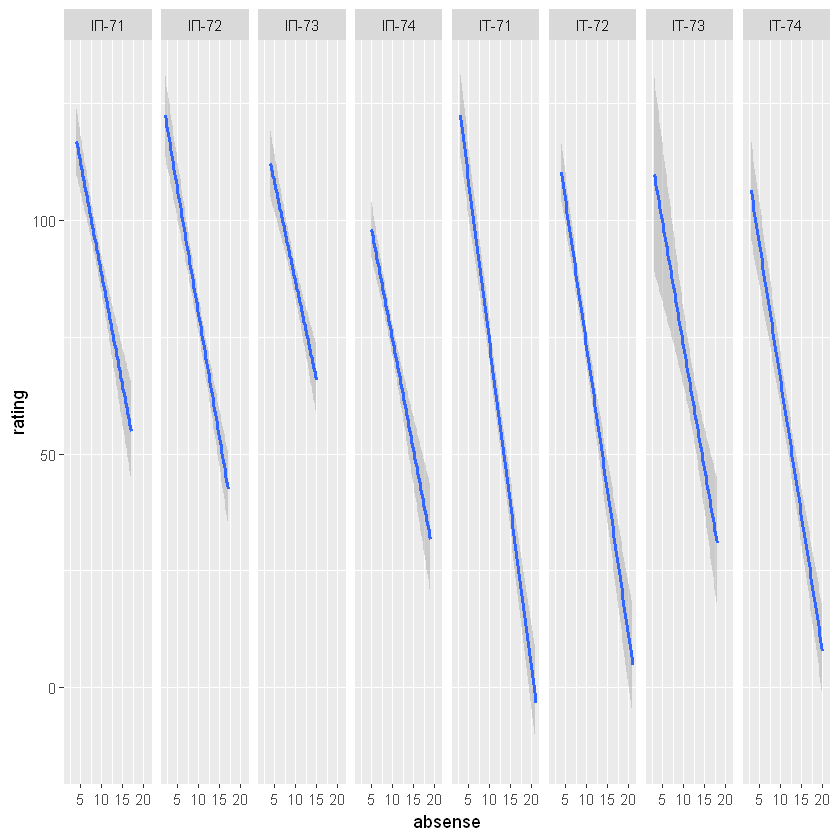

In [28]:
#smoothing line facet without line
ggplot(data, aes(absense, rating))+
  geom_smooth(method = "lm")+
  facet_grid(.~group)

In [29]:
fitted_values_rating = data.frame( student = data$num, rating = data$rating, fitted = lm.data$fitted.values)

In [30]:
new_absense = data.frame(absense = c(2,5,10,20))
new_absense$rating = predict(lm.data, new_absense)

In [31]:
head(new_absense)

absense,rating
2,125.46258
5,107.37095
10,77.21823
20,16.91280
